In [109]:
# Import packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
import xgboost as xgb
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import StackingClassifier
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.decomposition import PCA

In [110]:
# Setting output format

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_colwidth', None) 
pd.set_option('display.width', None) 

In [111]:
# Reading train and test datasets

train_df = pd.read_csv("./data/train_dataset.csv")
test_df = pd.read_csv("./data/test_dataset.csv")

print("Shape of train dataset is: ", train_df.shape)
print("Shape of test dataset is: ", test_df.shape)

train_df.head(20)

Shape of train dataset is:  (38984, 23)
Shape of test dataset is:  (16708, 22)


age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  eyesight(right)  \
0    35         170          85       97.0             0.9              0.9   
1    20         175         110      110.0             0.7              0.9   
2    45         155          65       86.0             0.9              0.9   
3    45         165          80       94.0             0.8              0.7   
4    20         165          60       81.0             1.5              0.1   
5    60         160          50       78.0             1.0              0.9   
6    40         175          90       95.0             0.9              1.0   
7    40         180          75       85.0             1.5              1.5   
8    40         170          60       74.0             1.2              1.5   
9    45         155          55       78.0             0.7              1.0   
10   40         160          60       77.6             0.5              0.5   
11   50         155          50       72.0             0.5              0.8   
12   50         160          60       89.0             0.8              0.8   
13   75         155          50       71.0             0.5              0.1   
14   40         150          40       62.0             1.0              1.5   
15   60         165          75       92.0             0.3              1.2   
16   50         170          75       84.0             1.0              1.2   
17   40         175          70       78.5             1.5              1.0   
18   40         170          65       81.0             1.5              1.5   
19   55         175          70       85.0             1.2              1.2   

    hearing(left)  hearing(right)  systolic  relaxation  fasting blood sugar  \
0               1               1       118          78                   97   
1               1               1       119          79                   88   
2               1               1       110          80                   80   
3               1               1       158          88                  249   
4               1               1       109          64                  100   
5               2               2       126          75                  114   
6               1               1       130          88                   90   
7               1               1       110          60                  100   
8               1               1        89          57                   83   
9               1               1       114          81                   96   
10              1               1       130          80                   94   
11              1               1       112          64                   83   
12              1               1       125          76                   97   
13              1               1       114          68                   86   
14              1               1       101          72                   78   
15              1               1       127          84                  129   
16              1               1       120          88                  268   
17              1               1       118          73                   55   
18              1               1       151         103                  134   
19              1               1       110          70                   93   

    Cholesterol  triglyceride  HDL  LDL  hemoglobin  Urine protein  \
0           239           153   70  142        19.8              1   
1           211           128   71  114        15.9              1   
2           193           120   57  112        13.7              3   
3           210           366   46   91        16.9              1   
4           179           200   47   92        14.9              1   
5           177            74   98   64        13.9              1   
6           207           331   39  102        16.5              1   
7           170            62   58   99        14.0              2   
8           178            69   6

In [112]:
train_df.corr()['smoking']

age                   -0.166268
height(cm)             0.394314
weight(kg)             0.299347
waist(cm)              0.223359
eyesight(left)         0.059409
eyesight(right)        0.064587
hearing(left)         -0.022077
hearing(right)        -0.018990
systolic               0.070176
relaxation             0.103663
fasting blood sugar    0.099908
Cholesterol           -0.027493
triglyceride           0.251057
HDL                   -0.179509
LDL                   -0.041627
hemoglobin             0.401206
Urine protein          0.013653
serum creatinine       0.212473
AST                    0.062834
ALT                    0.098615
Gtp                    0.240274
dental caries          0.107601
smoking                1.000000
Name: smoking, dtype: float64

In [113]:
# Renaming the columns for easier accessibility

new_column_names_train = {
    "age": "age",
    "height(cm)": "height",
    "weight(kg)": "weight",
    "waist(cm)": "waist",
    "eyesight(left)": "eyesight_left",
    "eyesight(right)": "eyesight_right",
    "hearing(left)": "hearing_left",
    "hearing(right)": "hearing_right",
    "systolic": "systolic",
    "relaxation": "relaxation",
    "fasting blood sugar": "fasting_blood_sugar",
    "Cholesterol": "cholesterol",
    "triglyceride": "triglyceride",
    "HDL": "hdl",
    "LDL": "ldl",
    "hemoglobin": "hemoglobin",
    "Urine protein": "urine_protein",
    "serum creatinine": "serum_creatinine",
    "AST": "ast",
    "ALT": "alt",
    "Gtp": "gtp",
    "dental caries": "dental_caries",
    "smoking": "smoker_status"
}

new_column_names_test = {
    "age": "age",
    "height(cm)": "height",
    "weight(kg)": "weight",
    "waist(cm)": "waist",
    "eyesight(left)": "eyesight_left",
    "eyesight(right)": "eyesight_right",
    "hearing(left)": "hearing_left",
    "hearing(right)": "hearing_right",
    "systolic": "systolic",
    "relaxation": "relaxation",
    "fasting blood sugar": "fasting_blood_sugar",
    "Cholesterol": "cholesterol",
    "triglyceride": "triglyceride",
    "HDL": "hdl",
    "LDL": "ldl",
    "hemoglobin": "hemoglobin",
    "Urine protein": "urine_protein",
    "serum creatinine": "serum_creatinine",
    "AST": "ast",
    "ALT": "alt",
    "Gtp": "gtp",
    "dental caries": "dental_caries"
}

train_df.rename(columns = new_column_names_train, inplace = True)
test_df.rename(columns = new_column_names_test, inplace = True)

train_df.head(20)

age  height  weight  waist  eyesight_left  eyesight_right  hearing_left  \
0    35     170      85   97.0            0.9             0.9             1   
1    20     175     110  110.0            0.7             0.9             1   
2    45     155      65   86.0            0.9             0.9             1   
3    45     165      80   94.0            0.8             0.7             1   
4    20     165      60   81.0            1.5             0.1             1   
5    60     160      50   78.0            1.0             0.9             2   
6    40     175      90   95.0            0.9             1.0             1   
7    40     180      75   85.0            1.5             1.5             1   
8    40     170      60   74.0            1.2             1.5             1   
9    45     155      55   78.0            0.7             1.0             1   
10   40     160      60   77.6            0.5             0.5             1   
11   50     155      50   72.0            0.5             0.8             1   
12   50     160      60   89.0            0.8             0.8             1   
13   75     155      50   71.0            0.5             0.1             1   
14   40     150      40   62.0            1.0             1.5             1   
15   60     165      75   92.0            0.3             1.2             1   
16   50     170      75   84.0            1.0             1.2             1   
17   40     175      70   78.5            1.5             1.0             1   
18   40     170      65   81.0            1.5             1.5             1   
19   55     175      70   85.0            1.2             1.2             1   

    hearing_right  systolic  relaxation  fasting_blood_sugar  cholesterol  \
0               1       118          78                   97          239   
1               1       119          79                   88          211   
2               1       110          80                   80          193   
3               1       158          88                  249          210   
4               1       109          64                  100          179   
5               2       126          75                  114          177   
6               1       130          88                   90          207   
7               1       110          60                  100          170   
8               1        89          57                   83          178   
9               1       114          81                   96          184   
10              1       130          80                   94          154   
11              1       112          64                   83          135   
12              1       125          76                   97          207   
13              1       114          68                   86          230   
14              1       101          72                   78          259   
15              1       127          84                  129          163   
16              1       120          88                  268          226   
17              1       118          73                   55          164   
18              1       151         103                  134          174   
19              1       110          70                   93          122   

    triglyceride  hdl  ldl  hemoglobin  urine_protein  serum_creatinine   ast  \
0            153   70  142        19.8              1               1.0    61   
1            128   71  114        15.9              1               1.1    19   
2            120   57  112        13.7              3               0.6  1090   
3            366   46   91        16.9              1               0.9    32   
4            200   47   92        14.9              1               1.2    26   
5             74   98   64        13.9              1               1.0    47   
6            331   39  102        16.5              1               1.0    19   
7             62   58   99        14.0              2               1.4    29 

In [114]:
# Dataset summary

train_df.describe()

age        height        weight         waist  eyesight_left  \
count  38984.000000  38984.000000  38984.000000  38984.000000   38984.000000   
mean      44.127591    164.689488     65.938718     82.062115       1.014955   
std       12.063564      9.187507     12.896581      9.326798       0.498527   
min       20.000000    130.000000     30.000000     51.000000       0.100000   
25%       40.000000    160.000000     55.000000     76.000000       0.800000   
50%       40.000000    165.000000     65.000000     82.000000       1.000000   
75%       55.000000    170.000000     75.000000     88.000000       1.200000   
max       85.000000    190.000000    135.000000    129.000000       9.900000   

       eyesight_right  hearing_left  hearing_right      systolic  \
count    38984.000000  38984.000000   38984.000000  38984.000000   
mean         1.008768      1.025369       1.026190    121.475631   
std          0.493813      0.157246       0.159703     13.643521   
min          0.100000      1.000000       1.000000     71.000000   
25%          0.800000      1.000000       1.000000    112.000000   
50%          1.000000      1.000000       1.000000    120.000000   
75%          1.200000      1.000000       1.000000    130.000000   
max          9.900000      2.000000       2.000000    233.000000   

         relaxation  fasting_blood_sugar   cholesterol  triglyceride  \
count  38984.000000         38984.000000  38984.000000  38984.000000   
mean      75.994408            99.342269    196.883491    126.749461   
std        9.658734            20.642741     36.353945     71.803143   
min       40.000000            46.000000     55.000000      8.000000   
25%       70.000000            89.000000    172.000000     74.000000   
50%       76.000000            96.000000    195.000000    108.000000   
75%       82.000000           104.000000    219.000000    160.000000   
max      146.000000           423.000000    445.000000    999.000000   

                hdl           ldl    hemoglobin  urine_protein  \
count  38984.000000  38984.000000  38984.000000   38984.000000   
mean      57.293146    115.081495     14.624264       1.086523   
std       14.617822     42.883163      1.566528       0.402107   
min        4.000000      1.000000      4.900000       1.000000   
25%       47.000000     91.000000     13.600000       1.000000   
50%       55.000000    113.000000     14.800000       1.000000   
75%       66.000000    136.000000     15.800000       1.000000   
max      359.000000   1860.000000     21.100000       6.000000   

       serum_creatinine           ast           alt           gtp  \
count      38984.000000  38984.000000  38984.000000  38984.000000   
mean           0.886030     26.198235     27.145188     39.905038   
std            0.220621     19.175595     31.309945     49.693843   
min            0.100000      6.000000      1.000000      2.000000   
25%            0.800000     19.000000     15.000000     17.000000   
50%            0.900000     23.000000     21.000000     26.000000   
75%            1.000000     29.000000     31.000000     44.000000   
max           11.600000   1090.000000   2914.000000    999.000000   

       dental_caries  smoker_status  
count   38984.000000   38984.000000  
mean        0.214421       0.367279  
std         0.410426       0.482070  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       1.000000  
max         1.000000       1.000000

In [115]:
# Checking for null values

missing_values_train = train_df.isnull().sum()
print("Missing values for each column in train dataset:\n", missing_values_train, "\n\n")

missing_values_test = test_df.isnull().sum()
print("Missing values for each column in test dataset:\n", missing_values_test)


Missing values for each column in train dataset:
 age                    0
height                 0
weight                 0
waist                  0
eyesight_left          0
eyesight_right         0
hearing_left           0
hearing_right          0
systolic               0
relaxation             0
fasting_blood_sugar    0
cholesterol            0
triglyceride           0
hdl                    0
ldl                    0
hemoglobin             0
urine_protein          0
serum_creatinine       0
ast                    0
alt                    0
gtp                    0
dental_caries          0
smoker_status          0
dtype: int64 


Missing values for each column in test dataset:
 age                    0
height                 0
weight                 0
waist                  0
eyesight_left          0
eyesight_right         0
hearing_left           0
hearing_right          0
systolic               0
relaxation             0
fasting_blood_sugar    0
cholesterol            0
triglyceri

As we can see, there are no missing/null values in the entire train and test dataset.

In [116]:
# Unique values

for column in train_df.columns:
    unique_values = train_df[column].unique()
    if len(unique_values) <= 10:
        unique_values_sorted = np.sort(unique_values)
        print(f"{column}: {len(unique_values)} unique values - {unique_values_sorted}")

print("We can see that the columns - hearing_left, hearing_right, urine_protein, dental_caries, smoker_status have less than 10 unique values and has discrete values. This implies that these columns are most likely categorical. We should change them to categorical data types.")

# train_df['hearing_left'] = train_df['hearing_left'].astype('category')
# train_df['hearing_right'] = train_df['hearing_right'].astype('category')
# train_df['urine_protein'] = train_df['urine_protein'].astype('category')
# train_df['dental_caries'] = train_df['dental_caries'].astype('category')
# train_df['smoker_status'] = train_df['smoker_status'].astype('category')

train_df.dtypes



hearing_left: 2 unique values - [1 2]
hearing_right: 2 unique values - [1 2]
urine_protein: 6 unique values - [1 2 3 4 5 6]
dental_caries: 2 unique values - [0 1]
smoker_status: 2 unique values - [0 1]
We can see that the columns - hearing_left, hearing_right, urine_protein, dental_caries, smoker_status have less than 10 unique values and has discrete values. This implies that these columns are most likely categorical. We should change them to categorical data types.


age                      int64
height                   int64
weight                   int64
waist                  float64
eyesight_left          float64
eyesight_right         float64
hearing_left             int64
hearing_right            int64
systolic                 int64
relaxation               int64
fasting_blood_sugar      int64
cholesterol              int64
triglyceride             int64
hdl                      int64
ldl                      int64
hemoglobin             float64
urine_protein            int64
serum_creatinine       float64
ast                      int64
alt                      int64
gtp                      int64
dental_caries            int64
smoker_status            int64
dtype: object

Correlation heatmap of continuous variables:


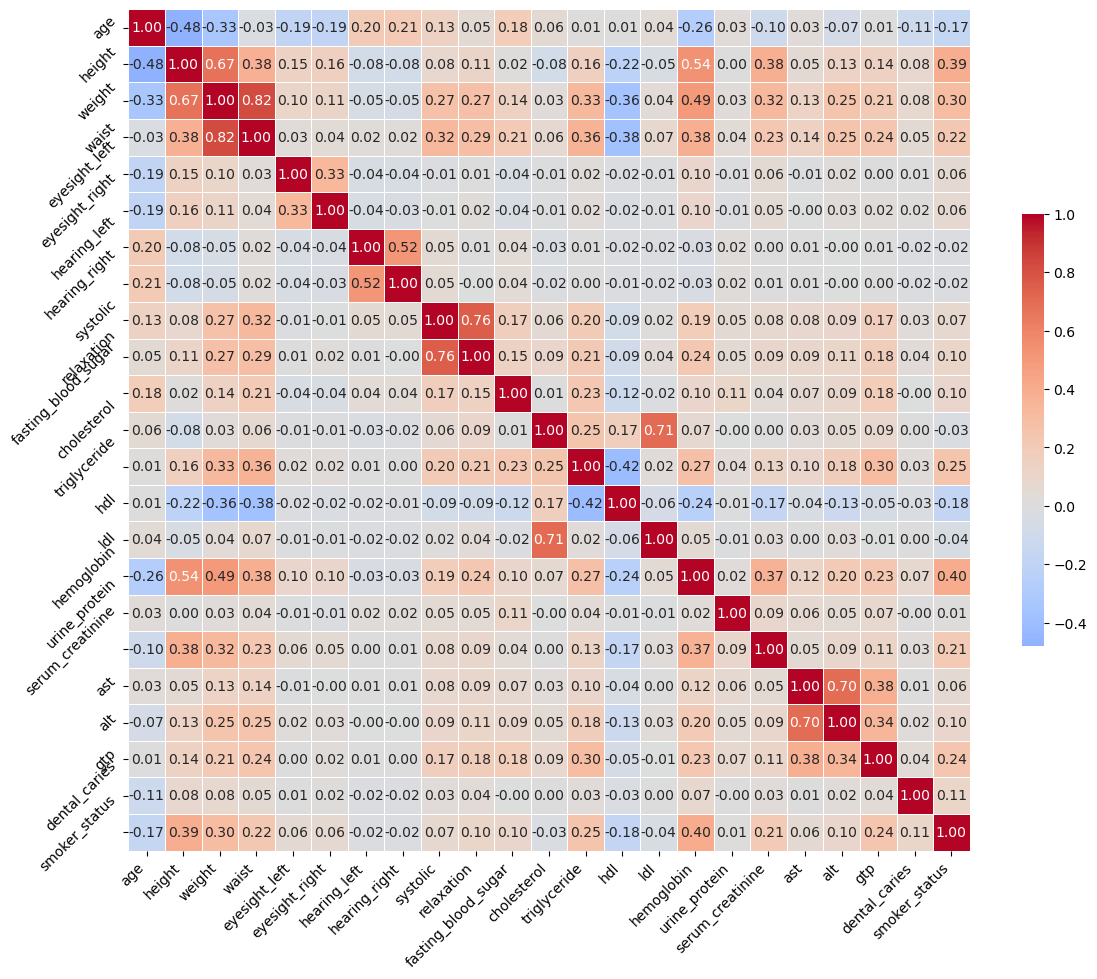

In [117]:
# Correlation analysis

correlation_matrix = train_df.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45)
plt.tight_layout()

print("Correlation heatmap of continuous variables:")
plt.show()


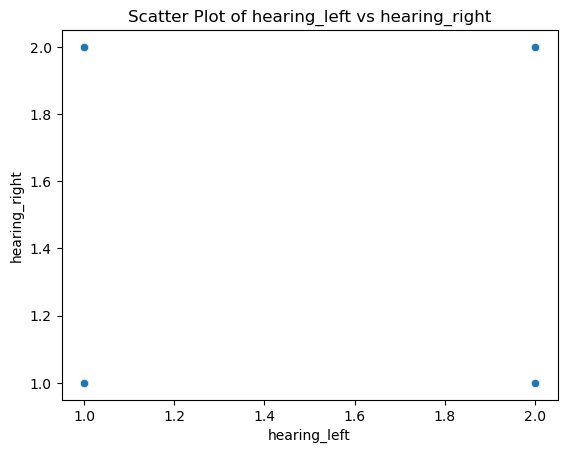

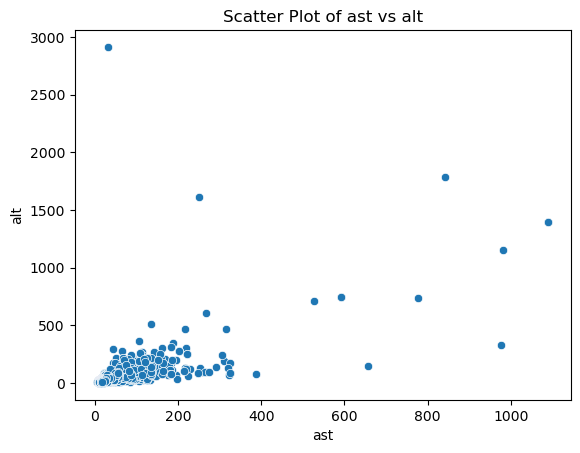

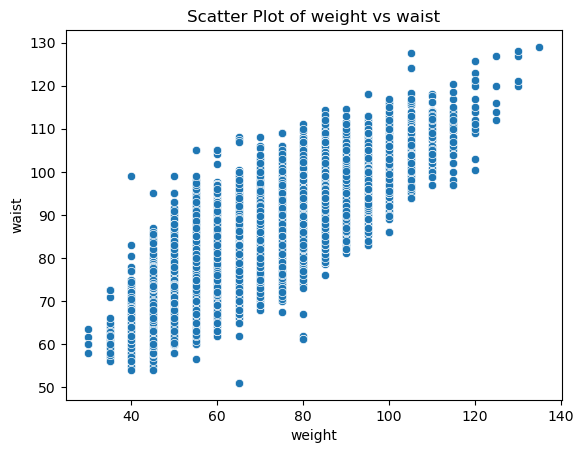

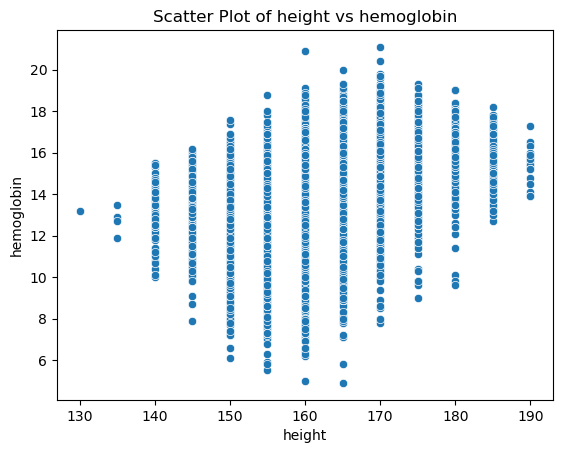

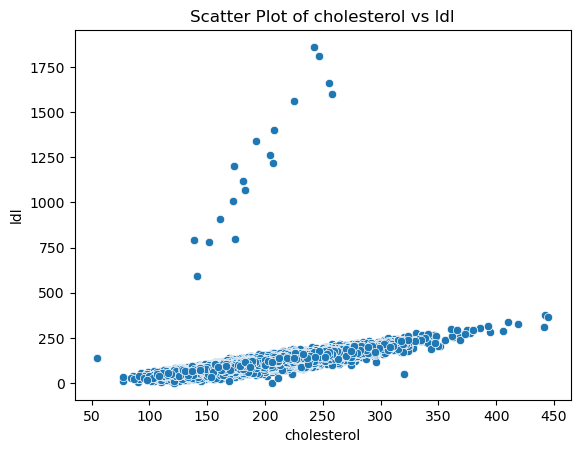

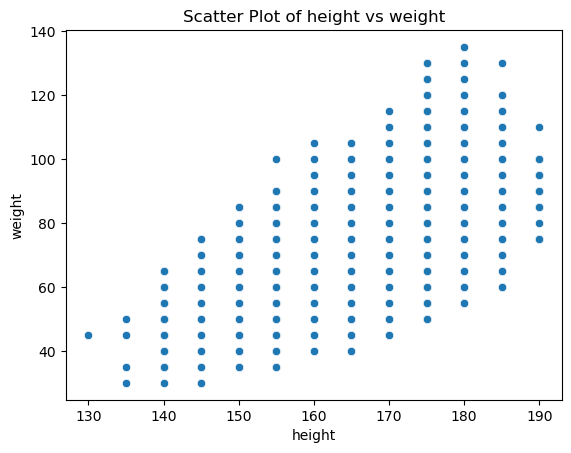

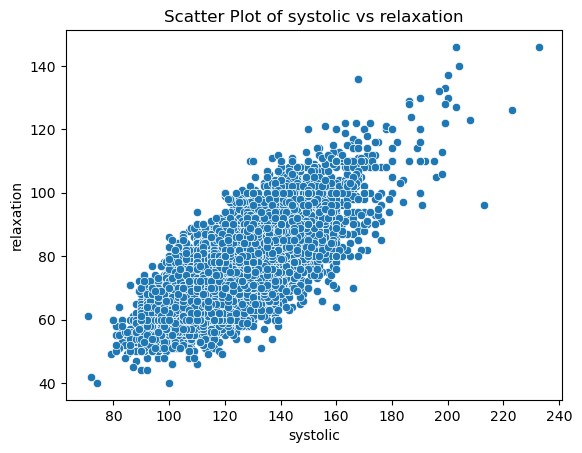

In [118]:
# Scatter plot analysis of columns with high positive (> 0.5) and negative (< -0.5) correlations.

import seaborn as sns
import matplotlib.pyplot as plt

plotted_pairs = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            col1, col2 = correlation_matrix.columns[i], correlation_matrix.columns[j]
            plotted_pairs.add((col1, col2))

for (col1, col2) in plotted_pairs:
    sns.scatterplot(data=train_df, x=col1, y=col2)
    plt.title(f'Scatter Plot of {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()


Observations:

1. Height vs Weight: This plot typically shows a positive correlation, as taller individuals tend to weigh more. This is expected and follows the pattern of body measurements.

2. Weight vs Waist: Another positive correlation where individuals with more weight have larger waist circumferences. It is consistent with body measurements and could be useful for body composition analysis.

3. AST vs ALT: Both AST (aspartate aminotransferase) and ALT (alanine aminotransferase) are liver enzymes, and their levels are usually correlated in various liver conditions. The positive correlation is expected, and high values for both might indicate liver health issues.

4. Cholesterol vs LDL: LDL (low-density lipoprotein) is a part of total cholesterol, so a positive correlation is logical. The plot might also identify cases of hypercholesterolemia, which could be significant for cardiovascular risk assessment.

5. Systolic vs Relaxation: These are two different blood pressure measurements, systolic (pressure during heartbeats) and diastolic (pressure between beats, also referred to as relaxation in your data). The positive correlation is expected since blood pressure tends to rise and fall in tandem between these two measures.

6. Height vs Hemoglobin: This relationship is less straightforward. While there is a biological plausibility that taller individuals might have slightly more blood volume and possibly more hemoglobin, this is not a well-established correlation and could be influenced by many other factors.

In [119]:
# Feature engineering

train_df['bmi'] = train_df['weight'] / ((train_df['height'] / 100) ** 2)
train_df['waist_to_height_ratio'] = train_df['waist'] / train_df['height']
train_df['bp_index'] = train_df['systolic'] / train_df['relaxation']

test_df['bmi'] = test_df['weight'] / ((test_df['height'] / 100) ** 2)
test_df['waist_to_height_ratio'] = test_df['waist'] / test_df['height']
test_df['bp_index'] = test_df['systolic'] / test_df['relaxation']



In [120]:
# Scaling columns

# Scaling numerical columns
columns_to_scale = ['age', 'height', 'weight', 'waist', 'eyesight_left', 'eyesight_right', 'systolic', 'relaxation', 'fasting_blood_sugar', 'cholesterol', 'triglyceride', 'hdl', 'ldl', 'hemoglobin', 'serum_creatinine', 'ast', 'alt', 'gtp', 'bmi', 'waist_to_height_ratio', 'bp_index']

scaler = StandardScaler()
train_df[columns_to_scale] = scaler.fit_transform(train_df[columns_to_scale])
test_df[columns_to_scale] = scaler.fit_transform(test_df[columns_to_scale])

# # Scaling categorical columns
# train_df['hearing_left'] = train_df['hearing_left'].map({1: 0, 2: 1})
# train_df['hearing_right'] = train_df['hearing_right'].map({1: 0, 2: 1})
# urine_protein_dummies_train = pd.get_dummies(train_df['urine_protein'], prefix='urine_protein')
# train_df = pd.concat([train_df, urine_protein_dummies_train], axis=1)
# train_df.drop('urine_protein', axis=1, inplace=True)

# test_df['hearing_left'] = test_df['hearing_left'].map({1: 0, 2: 1})
# test_df['hearing_right'] = test_df['hearing_right'].map({1: 0, 2: 1})
# urine_protein_dummies_test = pd.get_dummies(test_df['urine_protein'], prefix='urine_protein')
# test_df = pd.concat([test_df, urine_protein_dummies_test], axis=1)
# test_df.drop('urine_protein', axis=1, inplace=True)

train_df = pd.get_dummies(train_df,columns = ["hearing_left","hearing_right","urine_protein","dental_caries"], dtype = 'int8')
test_df = pd.get_dummies(test_df,columns = ["hearing_left","hearing_right","urine_protein","dental_caries"], dtype = 'int8')

train_df.head()



age    height    weight     waist  eyesight_left  eyesight_right  \
0 -0.756634  0.578022  1.478029  1.601630      -0.230592       -0.220264   
1 -2.000064  1.122246  3.416553  2.995481      -0.631779       -0.220264   
2  0.072319 -1.054651 -0.072789  0.422217      -0.230592       -0.220264   
3  0.072319  0.033798  1.090325  1.279972      -0.431185       -0.625281   
4 -2.000064  0.033798 -0.460494 -0.113879       0.972969       -1.840332   

   systolic  relaxation  fasting_blood_sugar  cholesterol  triglyceride  \
0 -0.254749    0.207648            -0.113468     1.158528      0.365595   
1 -0.181453    0.311183            -0.549463     0.388312      0.017416   
2 -0.841116    0.414717            -0.937013    -0.106826     -0.094001   
3  2.677083    1.242994             7.249989     0.360805      3.332077   
4 -0.914411   -1.241836             0.031863    -0.491933      1.020171   

        hdl       ldl  hemoglobin  serum_creatinine        ast        alt  \
0  0.869282  0.627725    3.303997          0.516592   1.814922   2.806007   
1  0.937693 -0.025220    0.814382          0.969863  -0.375390  -0.068515   
2 -0.020054 -0.071859   -0.590016         -1.296491  55.477568  43.847807   
3 -0.772570 -0.561568    1.452745          0.063321   0.302564   0.282815   
4 -0.704159 -0.538248    0.176020          1.423134  -0.010338   0.027302   

        gtp  smoker_status       bmi  waist_to_height_ratio  bp_index  \
0  1.712406              1  1.493166               1.350830 -0.681076   
1 -0.199324              0  3.350290               2.439749 -0.727951   
2  4.751051              0  0.820537               1.055056 -1.676282   
3 -0.078583              0  1.485457               1.334093  1.359832   
4 -0.501176              0 -0.611304              -0.145537  0.693118   

   hearing_left_1  hearing_left_2  hearing_right_1  hearing_right_2  \
0               1               0                1                0   
1               1               0                1                0   
2               1               0                1                0   
3               1               0                1                0   
4               1               0                1                0   

   urine_protein_1  urine_protein_2  urine_protein_3  urine_protein_4  \
0                1                0                0                0   
1                1                0                0                0   
2                0                0                1                0   
3                1                0                0                0   
4                1                0                0                0   

   urine_protein_5  urine_protein_6  dental_caries_0  dental_caries_1  
0                0                0                0                1  
1                0                0                0                1  
2                0                0                1                0  
3                0                0                1                0  
4                0                0                1                0

In [121]:
# Splitting train data to train (80%) and test (20%)

y = train_df['smoker_status'].astype(int)
x = train_df.drop('smoker_status', axis=1)

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2, random_state = 42)

print("Training set shape:", x_train.shape, y_train.shape)
print("Validation set shape:", x_val.shape, y_val.shape)



Training set shape: (31187, 33) (31187,)
Validation set shape: (7797, 33) (7797,)


In [122]:
pca = PCA(n_components=0.95)
x_train = pca.fit_transform(x_train)
x_val = pca.transform(x_val)

print(f"Reduced number of features: {x_train.shape[1]}")

Reduced number of features: 16


In [69]:
# Number of trees in random forest
n_estimators = [200, 500, 800]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [20, 40, 60, 80]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the param grid


param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

grid_lr = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, verbose=True)
grid_lr.fit(x_train, y_train)

print("Best Parameters for Logistic Regression:", grid_lr.best_params_)



Fitting 3 folds for each of 432 candidates, totalling 1296 fits


/Users/saran/Desktop/ECE720_Project/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
648 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
648 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/saran/Desktop/ECE720_Project/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    fit_params : dict, default=None
            ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/saran/Desktop/ECE720_Project/venv/lib/python3.11/site-packages/sklearn/base.py", line 1467, in wrapper
  File "/Users/saran/Desktop/ECE720_Project/venv/lib/python3.11/site-packages/sklearn/base.py", line 666, in _v

Best Parameters for Logistic Regression: {'bootstrap': True, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 800}


In [86]:
# Model selection

# Random forest best config: {'bootstrap': True, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 800}


models = {
    # "Logistic Regression": LogisticRegression(max_iter=5000, C=0.615848211066026, solver="newton-cg"),
    # "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(bootstrap=True, max_depth=40, max_features="sqrt", min_samples_leaf=1, min_samples_split=2, n_estimators=800),
    # "Gradient Boosting": GradientBoostingClassifier(),
    # "Support Vector Machine": SVC(probability=True)
}

# Function to calculate error rate
def error_rate(y_true, y_pred):
    return 1 - accuracy_score(y_true, y_pred)

# Store the performance metrics for each model
performance_metrics = {}

# Training and evaluating models
for name, model in models.items():
    temp = model.fit(x_train, y_train)
    print(temp)
    y_pred = model.predict(x_val)
    y_proba = model.predict_proba(x_val)[:, 1]  # Probability estimates for the positive class
    
    # Calculate metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    auc_roc = roc_auc_score(y_val, y_proba)
    error = error_rate(y_val, y_pred)
    
    # Store metrics
    performance_metrics[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC-ROC": auc_roc,
        "Error Rate": error
    }

# Display performance metrics for each model
for model, metrics in performance_metrics.items():
    print(f"Model: {model}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print("\n")

RandomForestClassifier(max_depth=40, n_estimators=800)
Model: Random Forest
Accuracy: 0.7902
Precision: 0.7118
Recall: 0.7062
F1 Score: 0.7090
AUC-ROC: 0.8809
Error Rate: 0.2098




In [142]:
# 80.29%
base_models = [
    ('rf', RandomForestClassifier(bootstrap=True, max_depth=40, max_features="sqrt", min_samples_leaf=1, min_samples_split=2, n_estimators=800)),
    ('dt', LGBMClassifier(min_child_weight=3,reg_alpha=1.0,subsample=1.0,learning_rate= 0.2,
                    n_jobs=-1,colsample_bytree= 0.9,objective = 'binary')),
    ('svc', SVC(probability=True))
]

# base_models = [
#     ('rf', DecisionTreeClassifier()),
#     ('dt', SVC(probability=True)),
#     ('svc', RandomForestClassifier(bootstrap=True, max_depth=40, max_features="sqrt", min_samples_leaf=1, min_samples_split=2, n_estimators=800))
# ]

# Meta-model
meta_model = CatBoostClassifier(n_estimators=1000,learning_rate= 0.2,depth= 5)

# Stacking ensemble
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Train the stacking model
stacking_model.fit(x_train, y_train)

# Evaluate the model
y_pred = stacking_model.predict(x_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:.4f}')

[LightGBM] [Info] Number of positive: 11496, number of negative: 19691
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 31187, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.368615 -> initscore=-0.538163
[LightGBM] [Info] Start training from score -0.538163
[LightGBM] [Info] Number of positive: 9197, number of negative: 15752
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000873 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 24949, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.368632 -> initscore=-0.538090
[LightGBM] [Info] Start training from score -0.538090
[LightGBM] [I

In [140]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import xgboost as xgb

# Adjusted base models with some tuned parameters
# base_models = [
#     ('catboost', CatBoostClassifier(n_estimators=1000,learning_rate= 0.2,depth= 5)),
#     ('lgbm', LGBMClassifier(min_child_weight=3,reg_alpha=1.0,subsample=1.0,learning_rate= 0.2,
#                     n_jobs=-1,colsample_bytree= 0.9,objective = 'binary')),
#     ('xgb', xgb.XGBClassifier(n_jobs=-1,colsample_bytree= 0.9,gamma= 0.1,learning_rate= 0.2,max_depth= 5,
#                          min_child_weight=3,reg_alpha=1.0,subsample=1.0))
# ]

base_models = [
    ('catboost', xgb.XGBClassifier(n_jobs=-1,colsample_bytree= 0.9,gamma= 0.1,learning_rate= 0.2,max_depth= 5,
                         min_child_weight=3,reg_alpha=1.0,subsample=1.0)),
    ('lgbm', LGBMClassifier(min_child_weight=3,reg_alpha=1.0,subsample=1.0,learning_rate= 0.2,
                    n_jobs=-1,colsample_bytree= 0.9,objective = 'binary')),
    ('xgb', CatBoostClassifier(n_estimators=1000,learning_rate= 0.2,depth= 5))
]

# Meta-model
meta_model = RandomForestClassifier(bootstrap=True, max_depth=40, max_features="sqrt", min_samples_leaf=1, min_samples_split=2, n_estimators=800)

# Stacking ensemble
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Train the stacking model
stacking_model.fit(x_train, y_train)

# Evaluate the model
y_pred = stacking_model.predict(x_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:.4f}')


[LightGBM] [Info] Number of positive: 11496, number of negative: 19691
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001035 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 31187, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.368615 -> initscore=-0.538163
[LightGBM] [Info] Start training from score -0.538163
0:	learn: 0.6358444	total: 3.79ms	remaining: 3.79s
1:	learn: 0.5986644	total: 7.62ms	remaining: 3.8s
2:	learn: 0.5755153	total: 11.5ms	remaining: 3.84s
3:	learn: 0.5590207	total: 15.2ms	remaining: 3.79s
4:	learn: 0.5482978	total: 18.9ms	remaining: 3.76s
5:	learn: 0.5403812	total: 22.6ms	remaining: 3.74s
6:	learn: 0.5341236	total: 26.1ms	remaining: 3.71s
7:	learn: 0.5297142	total: 29.7ms	remaining: 3.68s
8:	learn: 0.5254634	total: 33.4ms	remaining: 3.68s
9:	learn: 0.5209403	total: 37.4ms	remaining: 3.7

In [105]:
# Define the model
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))  # Sigmoid activation for binary classification

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Appropriate loss function for binary classification
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

# Model summary
model.summary()

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

history = model.fit(
    x_train, 
    y_train,
    epochs=100,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=[reduce_lr, early_stopping],  # early_stopping from previous example
    verbose=2
)
# Evaluate the model
val_loss, val_accuracy, val_auc = model.evaluate(x_val, y_val, verbose=2)
print(f"Validation Accuracy: {val_accuracy:.4f}, Validation AUC: {val_auc:.4f}")


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 128)               2176      
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                                 
 dense_20 (Dense)            (None, 1)                 65        
                                                                 
Total params: 10,497
Trainable params: 10,497
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
975/975 - 1s - loss: 0.5086 - accuracy

In [129]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout, ReLU, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

def build_advanced_model(input_shape):
    inputs = Input(shape=(input_shape,))
    x = Dense(512, kernel_regularizer=l2(0.001))(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    # Creating multiple parallel pathways simulating a 'DenseNet' architecture for tabular data
    for _ in range(3):
        shortcut = x
        x = Dense(256, activation='relu', kernel_regularizer=l2(0.001))(x)
        x = BatchNormalization()(x)
        x = Dropout(0.3)(x)
        x = concatenate([x, shortcut])
    
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Assuming x_train and y_train are your training data and labels
model = build_advanced_model(x_train.shape[1])

model.summary()

# Training the model with callbacks for early stopping and learning rate reduction
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)
]

history = model.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=callbacks, verbose=2)



Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 16)]         0           []                               
                                                                                                  
 dense_46 (Dense)               (None, 512)          8704        ['input_3[0][0]']                
                                                                                                  
 batch_normalization_14 (BatchN  (None, 512)         2048        ['dense_46[0][0]']               
 ormalization)                                                                                    
                                                                                                  
 re_lu_9 (ReLU)                 (None, 512)          0           ['batch_normalization_14[0]

ValueError: not enough values to unpack (expected 3, got 2)

In [135]:
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.callbacks import LearningRateScheduler
import numpy as np

# Learning rate scheduler function
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * np.exp(-0.1)

lr_schedule_callback = LearningRateScheduler(scheduler)

model = Sequential([
    Dense(256, input_shape=(x_train.shape[1],)),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.4),
    Dense(128),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.3),
    Dense(64),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[callbacks, lr_schedule_callback],
    verbose=2
)


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 256)               4352      
                                                                 
 batch_normalization_24 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 256)               0         
                                                                 
 dropout_49 (Dropout)        (None, 256)               0         
                                                                 
 dense_71 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_25 (Bat  (None, 128)              512       
 chNormalization)                                    